## 3b. Explainable Artificial Intelligence (XAI) - Shapley Additive Explanation (SHAP) using KernelSHAP for XGBoost

### Load Data and the Saved Model

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("../preprocessed/clean_survey.csv", index_col=False)
# split to indenpendent and dependent variables
# drop all variables computing the labels
X = df.drop(['q_031_adjusted', 'invol_score', 'q_031', 'involvement_level'] + [f'q_0{i}' for i in range(45, 55)], axis=1)
y = df["involvement_level"]

# Encode the class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_encoded_train, y_encoded_test = train_test_split(X, y_encoded, stratify=y_encoded, random_state=42)

"""# Data Preprocessing
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)"""

# Store in dataframe for plotting
feature_names = X_train.columns.tolist()
"""X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)"""

label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: 'High', 1: 'Low', 2: 'Medium'}


In [2]:
import pickle
# fit the best model
# Load the model from a file
with open('../models/xgboost_1.pkl', 'rb') as file:
    model1 = pickle.load(file)

# Making predictions
y_pred1 = model1.predict(X_test)

accuracy1 = accuracy_score(y_encoded_test, y_pred1)
print("Testing Subset Accuracy: ", accuracy1)
print("Hamming Loss:", hamming_loss(y_encoded_test, y_pred1))

# Micro-average
print("F1 Score (Micro):", f1_score(y_encoded_test, y_pred1, average='micro'))
# Macro-average
print("F1 Score (Macro):", f1_score(y_encoded_test, y_pred1, average='macro'))
# Weighted-average
print("F1 Score (Weighted):", f1_score(y_encoded_test, y_pred1, average='weighted'))

# ROC-AUC
# Note: roc_auc_score expects a shape of (n_samples,) for binary problems and
# (n_samples, n_classes) for multi-class/multi-label with one-hot encoding.
# ROC-AUC calculation needs probabilistic predictions `y_proba`
# use macro since class labels are imbalanced
y_proba = model1.predict_proba(X_test)
roc_auc = roc_auc_score(y_encoded_test, y_proba, average='macro', multi_class='ovr')
print("ROC-AUC (Macro):", roc_auc)



Testing Subset Accuracy:  0.680365296803653
Hamming Loss: 0.319634703196347
F1 Score (Micro): 0.680365296803653
F1 Score (Macro): 0.6282502955715838
F1 Score (Weighted): 0.6790551296302999
ROC-AUC (Macro): 0.8183944198121308


In [3]:
X_test

,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_125_none,q_125_other,q_130_ACT,q_130_NSW,q_130_NT,q_130_QLD,q_130_SA,q_130_TAS,q_130_VIC,q_130_WA
517,0.78,3,0,0,0,0,0,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
359,0.32,2,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
773,0.80,2,0,1,0,0,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
855,1.00,1,1,1,1,1,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
500,0.34,2,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.97,2,1,0,1,1,0,0,0,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
637,0.83,2,0,0,1,1,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
604,1.00,3,1,1,1,1,1,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
858,0.52,1,0,0,0,1,1,1,0,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y_encoded_test

array([2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2])

### 3.1 Compute Shapley Values (Using Testing Set)

In [5]:
label_mapping

{0: 'High', 1: 'Low', 2: 'Medium'}

In [9]:
def model1_predict_proba(X):
    return model1.predict_proba(X)

import shap
shap.initjs()

# model1 is the trained MLPClassifier model
# Create a SHAP KernelExplainer object
shap_explainer = shap.KernelExplainer(model1_predict_proba, X_train)

# Compute SHAP values for each sample in the X_test dataset
shap_values = shap_explainer.shap_values(X_test)  # Use a subset for efficiency

Using 656 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/219 [00:00<?, ?it/s]

In [10]:
import pickle
# Save shap values using pickle
with open('../shaps/shap_values_kernel_xgboost.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

In [11]:
# length = 3
shap_values

[array([[-0.00033604, -0.0006832 , -0.00014774, ..., -0.00021096,
         -0.00062996, -0.00046551],
        [-0.00730726, -0.00194241,  0.        , ...,  0.        ,
          0.00053379, -0.00047473],
        [ 0.00038029, -0.00019059,  0.        , ..., -0.00016694,
          0.        ,  0.00018427],
        ...,
        [ 0.01641443, -0.00075301,  0.0006033 , ...,  0.        ,
         -0.0019047 ,  0.0017703 ],
        [-0.03517244,  0.00837818, -0.00096607, ..., -0.00066823,
         -0.00116218, -0.00073587],
        [ 0.01221746, -0.00443883,  0.        , ...,  0.0005519 ,
          0.00210703,  0.        ]]),
 array([[-0.01742273, -0.0095798 ,  0.        , ...,  0.        ,
          0.00071565,  0.00716492],
        [ 0.03071576, -0.00326516,  0.0005566 , ..., -0.00033772,
         -0.00106508, -0.00069876],
        [-0.00863342, -0.0018353 ,  0.00247807, ...,  0.0001944 ,
         -0.00273637, -0.00187861],
        ...,
        [-0.01131838, -0.0037312 , -0.00076639, ..., -

### Using X_train as Background Data:
- Pros:
1. Represents the distribution of data the model was trained on, which can provide insights into how the model makes predictions based on its learned patterns.
2. Likely covers a wider range of feature values and combinations, potentially leading to more generalizable explanations.
- Cons:
1. Larger datasets can significantly increase computation time and resource consumption, as SHAP values are estimated based on comparisons against the background dataset.
2. If the training data is very large, using the entire X_train may not be practical, and selecting a representative sample becomes crucial.
### Using X_test as Background Data:
- Pros:
1. Directly relevant to the set of instances you're evaluating, which can make the explanations more focused on the predictions of interest.
2. Typically smaller than the training set, which can reduce computation times and make the use of the full dataset more feasible.
- Cons:
1. May not represent the full range of data the model was trained on, potentially limiting the generalizability of the explanations.
2. If the test set is not representative of the training data, explanations may be biased or not reflect how the model operates across its entire input space.
### Comparison:
Train SHAP and Test SHAP are not significantly different, the features only differ in the ranking of importance

### 3.2 SHAP Force Plot
Force plots show the contribution of each feature to the model prediction for individual predictions.

### 3.2a) Force Plots for 'Low' Class
- Make a force plot for the first instance in test set (X_test.iloc[0]):
- explainer.expected_value[1]: The expected value for Class 'Low' (index 1). This value is the reference from which the SHAP values start (baseline prediction before taking into account the effect of any features).
- shap_values[1][0]: The SHAP values for the first instance with respect to the second class.
- X_test.iloc[0]: The actual feature values of the first instance in the test set.


In [12]:
from matplotlib import pyplot as plt
# Set the style to 'white' or another light theme
plt.style.use('seaborn-whitegrid')

# force plot for the first instance in test set, using 'Low' class
shap.force_plot(shap_explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

From the force plot we can see the baseline expected probability of predicting class 'Low', before considering the effect of any specific features of the instance being explained is 0.25. q_130_VIC=1 has the strongest positive effect and q_025=1 has the strongest negative impact.
- q_130: In which state do you live. (Victoria)
- q_021: I have renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators) (No)
- q_024: I plan to install renewables (solar PV, solar hot water, home battery, wind or bioenergy generator) (YES)
- q_025: I want to generate some or more renewable energy but currently have barriers (for example renting, inappropriate roof, shading, unit complex etc) (YES)
#### Comments: 
This means for this particular instance (index 0), living in Victoria and not having renewable energy installed etc contribute to a higher probability of a Low Participation. Conversely, having a plan to install or generate renewable energy etc deviate the prediction from a Low Participation.

In [13]:
# For multiple predictions (e.g., first 10 predictions)
shap.force_plot(shap_explainer.expected_value[1], shap_values[1][:10], X_test.iloc[:10])

#### Comments:
Similar pattern can be seen for instance 0, 1, 7 etc. Not having renewable energy installed increase the probability of predicting Low Participation, while the plan to install deviates the prediction from Low Participation.

### 3.2b) Force Plots for 'Medium' Class

In [14]:
# force plot for the first instance in test set, using 'Medium' class
shap.force_plot(shap_explainer.expected_value[2], shap_values[2][0], X_test.iloc[0])

From the force plot we can see the baseline expected probability of predicting class 'Medium', before considering the effect of any specific features of the instance being explained is 0.71. q_025=1 has the strongest positive effect and q_130_VIC=1 has the strongest negative impact.
- q_025: I want to generate some or more renewable energy but currently have barriers (for example renting, inappropriate roof, shading, unit complex etc) (YES)
- q_126: Which age range are you in? (45 to 54)
- q_043: Being involved in decision-making to participate in a community energy group or project (Slightly Important)
- q_130: In which state do you live. (Victoria)
- q_123: Where do you live? (Regional)
- q_101: Reduce the risk of destruction of land and water is one of the main benefits of switching to renewable energy (YES)
#### Comments: 
This means for this particular instance (index 0), the desire of generating renewable energy and aging between 45 to 54 etc associat with a higher probability of a Medium Participation. Conversely, living in Regional area of Victoria etc associate with a prediction deviation from a Medium Participation.

In [15]:
# For multiple predictions (e.g., first 10 predictions)
shap.force_plot(shap_explainer.expected_value[2], shap_values[2][:10], X_test.iloc[:10])

#### Comments:
For a particular instance at position 0 (test set), q_025 is not shown, but q_126 and q_043 are shown. Likewise for the unseen q_123_regional. This is because the visualisation tends to highlight features that **consistently** have a strong impact across multiple instances. If a feature is the strongest impactor for one instance but not for others, it might not be labeled in the summary plot.

In short, that means for instance 0, aging between 45-54 and viewing decision-making to participate in a community energy project as slightly important is associated with a higher probability in Medium Participation. While living in Victoria and considering the risk reduction of destruction of land and water as a renewable energy benefit associated with a lower probability of Medium Participation. In particular, considering the risk reduction of destruction of land and water as a benefit contributes to a higher probability of `Low Partcipation`.

### 3.2c Force Plots for 'High' Class 

In [16]:
# force plot for the first instance in test set, using 'High' class
shap.force_plot(shap_explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

From the force plot we can see the baseline expected probability of predicting class 'High', before considering the effect of any specific features of the instance being explained is 0.04. q_024=1 has the strongest positive effect and q_021=0 has the strongest negative impact.
- q_024: I plan to install renewables (solar PV, solar hot water, home battery, wind or bioenergy generator) (YES)
- q_006: Medium & large scale corporate-owned renewables projects to achieve renewable energy target (YES)
- q_021: I have renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators) (NO)
- q_126: Which age range are you in? (45 to 54)
#### Comments: 
This means for this particular instance (index 0), the plan to install renewables and considering Medium & large scale corporate-owned projects to achieve renewable energy target etc associate with a higher High Participation probability. Conversely, not having renewable energy installed and aging between 45 to 54 associat with a lower probability of High Participation. In particular, not having renewable energy installed increased the probability of `Low Participation`

In [17]:
# For multiple predictions (e.g., first 10 predictions)
shap.force_plot(shap_explainer.expected_value[0], shap_values[0][:10], X_test.iloc[:10])

For instance 0, the most impactful feature is left with q_021. That means not having renewable energy installed significantly deviate away the prediction of High Participation.

### 3.3 SHAP Feature Importance Plot
This plot shows the most important features that influence the model's predictions. Green is class 'High', Blue is class 'Low' and Pink is class 'Medium'.

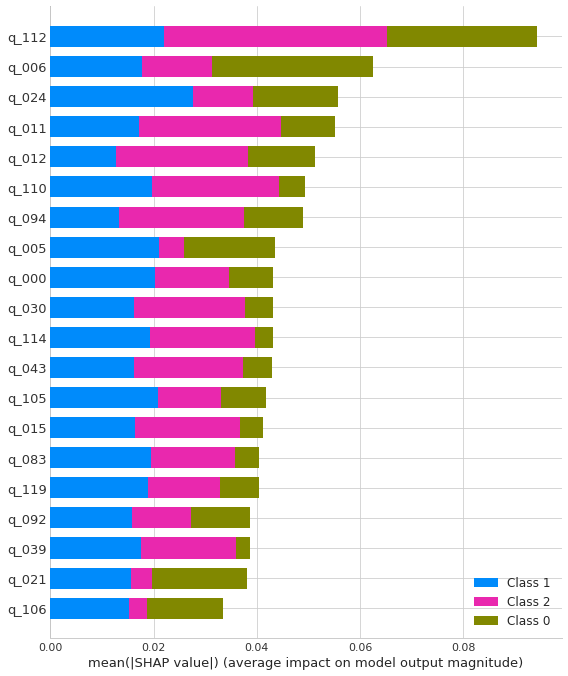

In [18]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

We can see that Low and Medium Participations use some features equally. That may be the reason to a **prediction confusion** between the two classes.

The top 3 overeall (average) influential factors are q_030, q_021 and q_025 meaning they have a higher average impact on model output, indicating they are more important for the model's decisions. In particular, q_021 is more influential in predicting 'Low' than 'High' or 'Medium'. Besides, the plot shows that a feature that is highly influential for one class may be less so for another. To inspect more specifically, we plot the class-wise percentage contribution plot. 

1. Convert SHAP values to absolute values, sums values for each feature within each predicted class
2. Calculate percentage contribution of each feature to the SHAP values for each class
3. Build a dataframe of percentage contributions of each feature by class.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert to absolute values for percentage calculation, shape = 3 (num of classes) * 219
absolute_shap_values = [np.abs(values) for values in shap_values]

# standardise values (no difference once individual values are aggregated)
#max_shap_values_by_class = np.array([values.max() for values in absolute_shap_values])
#absolute_shap_values = [values / max_shap for values, max_shap in zip(absolute_shap_values, max_shap_values_by_class)]

# Step 2: Calculate the sum of SHAP values for all features in each class, shape = 3 (num of classes)
total_shap_values_per_class = np.array([values.sum() for values in absolute_shap_values])
# Calculate the percentage contribution of each feature to each class, shape = 3 (num of classes) * 219
percentage_contributions = [values / total for values, total in zip(absolute_shap_values, total_shap_values_per_class)]


# Step 3: Create a DataFrame for each class and concatenate them
feature_names = X_train.columns.tolist()
class_contributions = []
for i, class_percentage in enumerate(percentage_contributions):
    df = pd.DataFrame(class_percentage, columns=feature_names)
    df_sum = df.sum(axis=0)  # Sum over all samples
    class_contributions.append(df_sum)

# Combine into a single DataFrame for plotting
df_contributions = pd.concat(class_contributions, axis=1)
df_contributions.columns = [f'Class {i}' for i in range(len(class_contributions))]

# Rename columns
rename_dict = {
    'Class 0': 'High',
    'Class 1': 'Low',
    'Class 2': 'Medium'
}
df_contributions.rename(columns=rename_dict, inplace=True)

# reorder the columns
df_contributions = df_contributions[['Low', 'Medium', 'High']]
df_contributions


,Low,Medium,High
q_000,0.028805,0.021651,0.021264
q_001,0.005536,0.007569,0.003290
q_003,0.001409,0.001338,0.000868
q_004,0.003691,0.004057,0.005813
q_005,0.029852,0.007352,0.043625
...,...,...,...
q_130_QLD,0.001353,0.001386,0.000663
q_130_SA,0.006584,0.004528,0.004091
q_130_TAS,0.000492,0.000477,0.000646
q_130_VIC,0.001772,0.001384,0.002228


4. Compute mean absolute SHAP values for each feature 
5. Extract the top 20 (overall) significant features consistent with the feature importance plot.

In [20]:
# Step 4: Calculate mean absolute SHAP values for each feature
# If shap_values is a multi-output (e.g., for multi-class classification), you need to aggregate across all classes.
# This code assumes shap_values is structured with one element per class (for multi-class) or just a single array for binary.
if isinstance(shap_values, list):  # Multi-class scenario
    # Aggregate SHAP values across all classes, then compute the mean absolute value for each feature
    aggregated_shap = np.sum([np.abs(values) for values in shap_values], axis=0)
else:  # Binary classification scenario
    aggregated_shap = np.abs(shap_values)

mean_abs_shap_values = np.mean(aggregated_shap, axis=0)

# Create a DataFrame for easier manipulation and visualization
df_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'MeanAbsSHAP': mean_abs_shap_values
}).sort_values(by='MeanAbsSHAP', ascending=False)

# Step 5: Identify the most important features based on mean absolute SHAP values
top_features_list = df_feature_importances.head(20)['Feature'].tolist()
top_features_list


['q_112',
 'q_006',
 'q_024',
 'q_011',
 'q_012',
 'q_110',
 'q_094',
 'q_005',
 'q_000',
 'q_030',
 'q_114',
 'q_043',
 'q_105',
 'q_015',
 'q_083',
 'q_119',
 'q_092',
 'q_039',
 'q_021',
 'q_106']

In [21]:
with open ("../shaps/top_features_kernel", "wb") as f:
    pickle.dump(top_features_list, f)

**NOTE**: The ordering of the features ranked by Mean Absolute SHAP values (sum of average impact on each class) is slightly different to the ordering of features ranked by total percentage contributions to all three classes. This is because the computation of percentage contributions rescaled for each class, particularly for 'High' class where the SHAP values are low. It shows that a feature can have a significant impact on model output (high SHAP value) but might not necessarily contribute a large percentage to the prediction of a certain class (contribution percentage)

6. Map the significant features in the contribution dataframe

In [22]:
# Step 6: Sum contributions across all classes for each feature row and map them
df_contributions['Total'] = df_contributions.sum(axis=1)

# Sort the features based on total contribution and select top 20
top_features = df_contributions.sort_values(by='Total', ascending=False)

# Drop the total column as it's no longer needed for plotting
top_features = top_features.drop(columns=['Total'])
top_features = top_features.loc[top_features_list] # select the top features based on Mean Absolute SHAP

# Reverse the DataFrame to have the highest contributions at the top in the plot
top_features = top_features.iloc[::-1]
#top_features


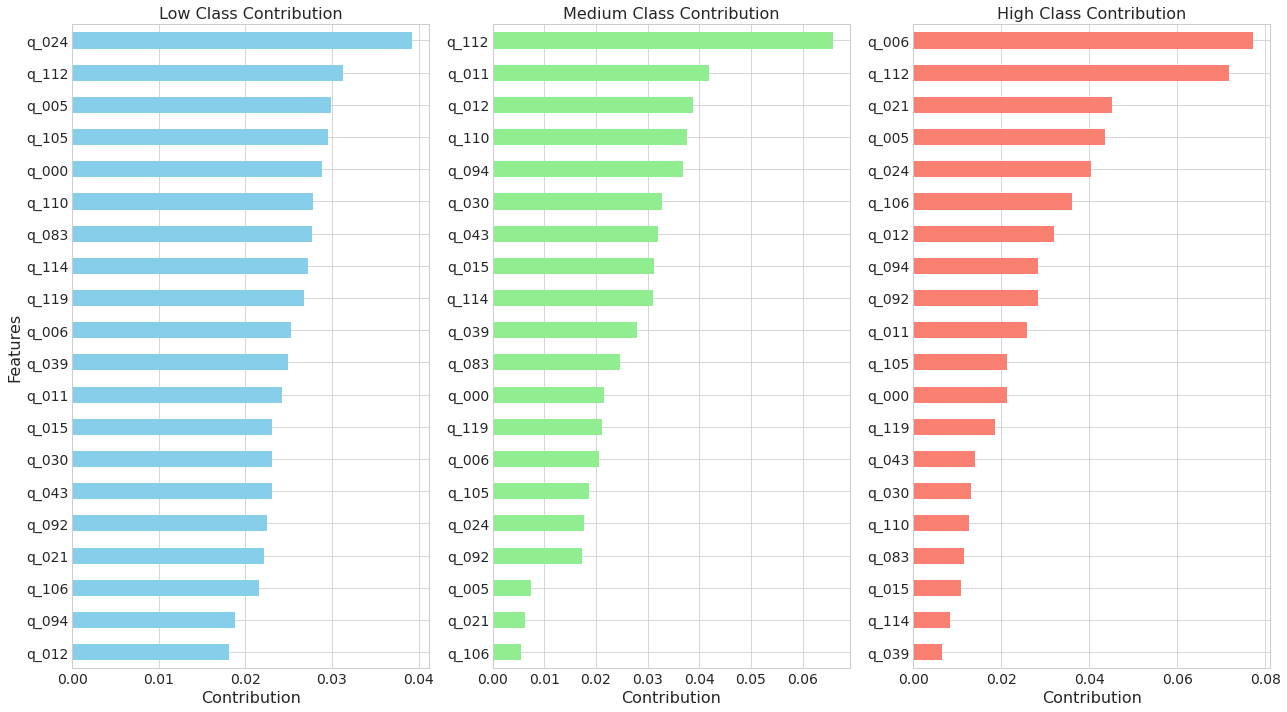

In [23]:
# Sort the dataframe by the highest-contributing feature in each class
df_sorted_low = top_features.sort_values('Low', ascending=False)
df_sorted_medium = top_features.sort_values('Medium', ascending=False)
df_sorted_high = top_features.sort_values('High', ascending=False)

# Plotting using horizontal bars and sorted order from top to bottom for descending order on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

df_sorted_low['Low'].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Low Class Contribution', fontsize=16)
axes[0].set_xlabel('Contribution', fontsize=16)
axes[0].set_ylabel('Features', fontsize=16)
axes[0].tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels
axes[0].tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels
axes[0].invert_yaxis()  # Invert y-axis to have the highest contributions at the top

df_sorted_medium['Medium'].plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Medium Class Contribution', fontsize=16)
axes[1].set_xlabel('Contribution', fontsize=16)
axes[1].tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels
axes[1].tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels
axes[1].invert_yaxis()

df_sorted_high['High'].plot(kind='barh', ax=axes[2], color='salmon')
axes[2].set_title('High Class Contribution', fontsize=16)
axes[2].set_xlabel('Contribution', fontsize=16)
axes[2].tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels
axes[2].tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

7. Plot in the same order as displayed in the feature importance plot

In [24]:
# Step 3: Plot
"""fig, ax = plt.subplots(figsize=(12, 10))
top_features.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Percentage Contribution', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('Top 20 Features by Class Contribution Percentage', fontsize=16)
ax.tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels
plt.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()"""


"fig, ax = plt.subplots(figsize=(12, 10))\ntop_features.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')\nax.set_xlabel('Percentage Contribution', fontsize=14)\nax.set_ylabel('Features', fontsize=14)\nax.set_title('Top 20 Features by Class Contribution Percentage', fontsize=16)\nax.tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels\nax.tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels\nplt.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')\nplt.tight_layout()\nplt.show()"

### Feature Importance Plot
Each bar represents the average impact of a feature on the model's output. The length of the bar corresponds to the mean absolute SHAP value across all samples in the test set for that feature, which is a measure of the feature's importance. All features are ordered by overall importance (higher average impact on model output on top)

### Feature Contribution Percentage Plot
Provides a view of how much each feature contributes to the prediction for each class relative to the total contributions for that class.
Also shows the distribution of impact each feature has across the different classes.
Note the length of the bars do not have the same significance as in the feature importance plot, since the percentages are relative to each class.

#### Comments:
Across all features, q_030 seems to have the highest contribution (3.743%) in predicting Low Participation and Medium Participation (3.736%). q_021 seems to have the highest contribution in predicting High Participation (5.035%).

##### Top 3 influential features in predicting probability of `Low Participation`
- q_030: Do you face any other issues from the electricity grid?
- q_021: I have renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators)
- q_025: I want to generate some or more renewable energy but currently have barriers (for example renting, inappropriate roof, shading, unit complex etc)

##### Top 3 influential features in predicting probability of `Medium Participation`
- q_030: Do you face any other issues from the electricity grid?
- q_025: I want to generate some or more renewable energy but currently have barriers (for example renting, inappropriate roof, shading, unit complex etc)
- q_112: How much do you agree: joining a community energy project is risky because the government may change the rules (taxes, subsidies)

##### Top 3 influential features in predicting probability of `High Participation`
- q_021: I have renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators)
- q_024: I plan to install renewables (solar PV, solar hot water, home battery, wind or bioenergy generator)
- q_023: I have an electric vehicle

### 3.4 SHAP Summary Plot
Summary plots provide a birds-eye view of the feature importance and what is driving the predictions.



### 3.4a) For Class 'Low'

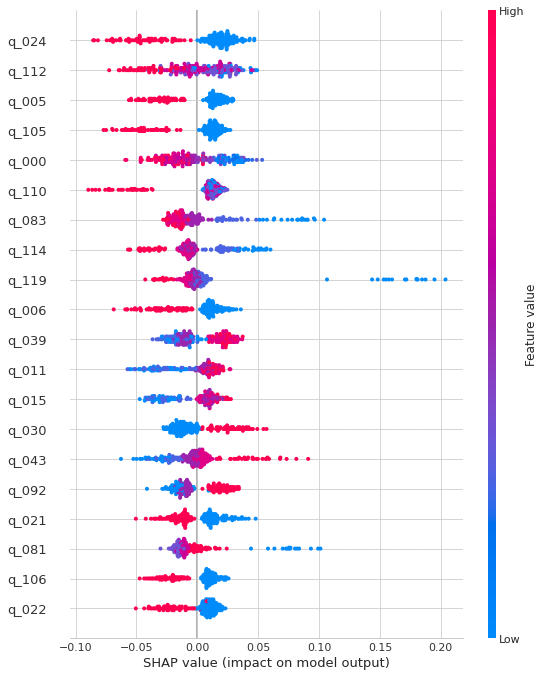

In [25]:
shap.summary_plot(shap_values[1], X_test)

When prediction outcome is **'Low'**, 
- Facing some electricity grid issues (q_030), living in urban area (q_123), high concerns with State Government policies, regulations or politics (q_015) etc drive the prediction towards Low Participation.
- Having renewable energy installed (q_021), wanting to generate renewable energy (q_025), planning to install renewables (q_024) etc deviate the prediction away from Low Participation. 

### 3.4b) For Class 'Medium'

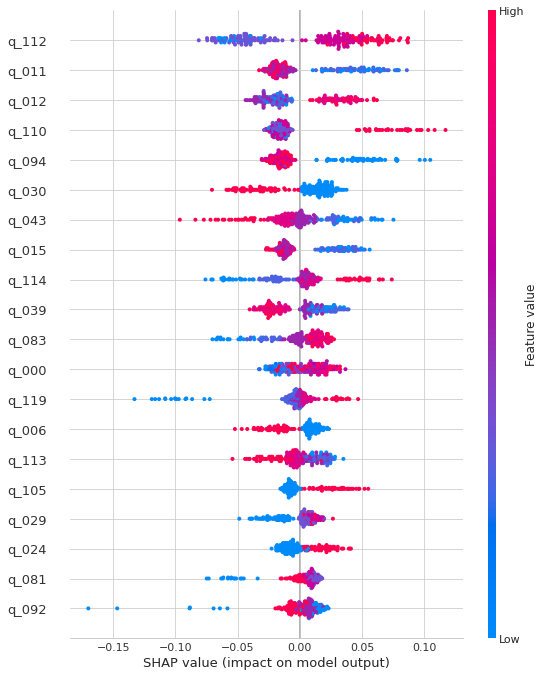

In [26]:
shap.summary_plot(shap_values[2], X_test)

When prediction outcome is **'Medium'**, 
- Wanting to generate renewable energy (q_025), Higher tendency in considering community energy project risky because the government may change the rules (taxes, subsidies) (q_112), purchasing renewable 'Green' energy through an electricity retailer (q_020) etc increase the prediction likelihood.
- Facing some issues from electricity grid (q_030), living in urban area (q_123), high concerns with State Government policies, regulations or politics (q_015) etc lower the prediction likelihood.

### 3.4c) For Class 'High'

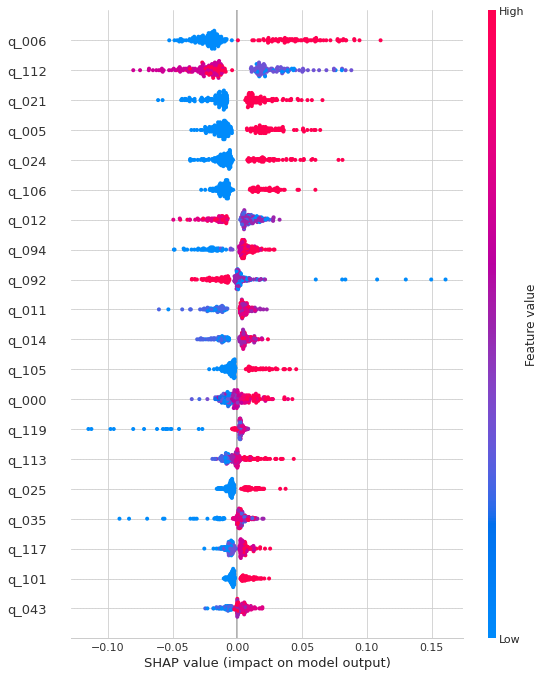

In [27]:
shap.summary_plot(shap_values[0], X_test)

When prediction outcome is **'High'**, 
- Having renewable energy installed (q_021), planning to install renewables (q_024), supporting medium & large scale corporate-owned renewables projects to achieve renewable energy target (q_006) etc increase the prediction likelihood.
- Having big divisions in community about coal or gas (q_092), older age groups (q_126), high concerns with grid transmission problems (q_013) etc decrease the prediction likelihood.

### 3.5. SHAP Dependence Plot
Dependence plots show the effect of a single feature across the whole dataset, which can highlight patterns in how the feature impacts the prediction.

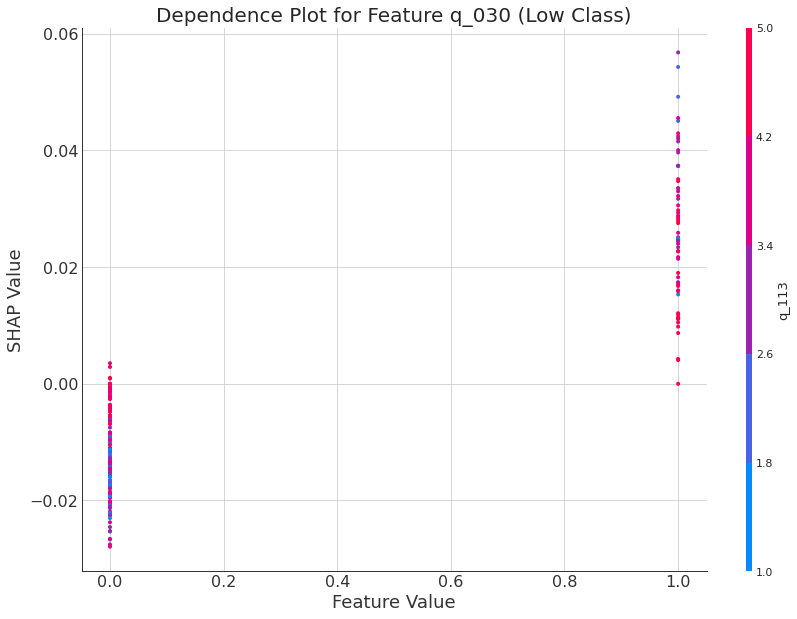

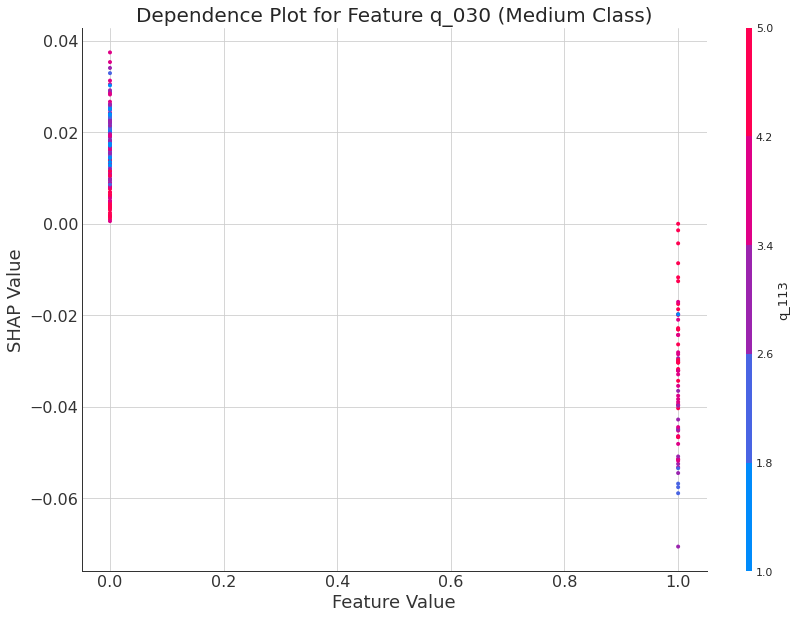

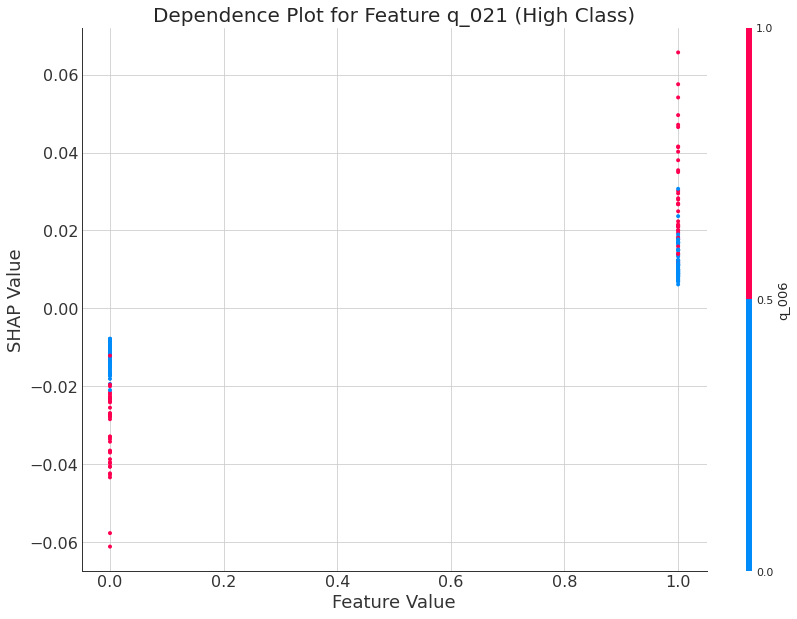

In [28]:
# 'Low' Class
fig, ax = plt.subplots(1, 1, figsize=(14,10))
shap.dependence_plot('q_030', shap_values[1], X_test, interaction_index="auto", ax=ax, show=False)
# Adjust label sizes on the x and y axes, as well as the title and tick parameters
ax.set_title('Dependence Plot for Feature q_030 (Low Class)', fontsize=20)
ax.set_xlabel('Feature Value', fontsize=18)
ax.set_ylabel('SHAP Value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# 'Medium' Class
fig, ax = plt.subplots(1, 1, figsize=(14,10))
shap.dependence_plot('q_030', shap_values[2], X_test, interaction_index="auto", ax=ax, show=False)
ax.set_title('Dependence Plot for Feature q_030 (Medium Class)', fontsize=20)
ax.set_xlabel('Feature Value', fontsize=18)
ax.set_ylabel('SHAP Value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# 'High' Class
fig, ax = plt.subplots(1, 1, figsize=(14,10))
shap.dependence_plot('q_021', shap_values[0], X_test, interaction_index="auto", ax=ax, show=False)
ax.set_title('Dependence Plot for Feature q_021 (High Class)', fontsize=20)
ax.set_xlabel('Feature Value', fontsize=18)
ax.set_ylabel('SHAP Value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

##### Top influencer for Low and Medium:
- q_030: Do you face any other issues from the electricity grid?
- Most interactive: q_000: Preference for Australia's future energy mix as a percentage 
##### Top ininfluencer for High: 
- q_021: I have renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators)
- Most interactive: q_006: Medium & large scale corporate-owned renewables projects to achieve renewable energy target

##### Comments:
- Low and Medium class shows opposite relationship between q_030 values and SHAP values
- Low Class: large q_000 values and 'Yes' to q_030 contribute positively to predicting the class. Having low q_000 and 'No' to q_030 contribute negatively.
- Medium Class: large q_000 values and 'Yes' to q_030 contribute negatively to predicting the class. Having large q_000 but 'No' to q_030 contribute positively. 
- High Class: Having 'Yes' to q_021 and q_006 contribute positively to predicting the class. Having 'No' to q_021 but 'Yes' to q_006 contribute negatively.